## Questão 1


Considere a seguinte função:
  
$f(x)=sin(ωx)$
  
com $ω=2π,$ o que corresponde a uma oscilação completa no intervalo de x=0 até x=1 

- Essa função é comum na descrição de fenômenos oscilatórios, como movimentos harmônicos simples, vibrações mecânicas e correntes alternadas.
  

---    
### a) Visualização e análise analítica

- Plote o gráfico da função f(x)=sin(2πx) no intervalo de 0 a 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

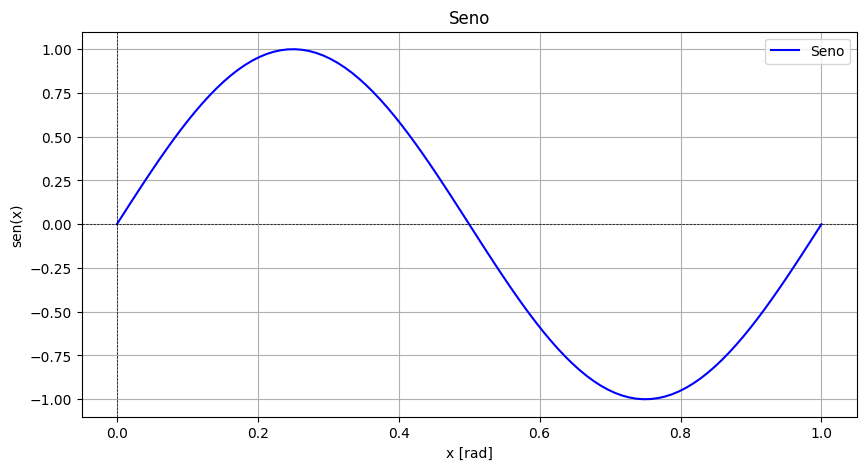

In [4]:
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)

# plota
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Seno', color='blue')
plt.title('Seno')
plt.xlabel('x [rad]')
plt.ylabel('sen(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()
   

---
- Obtenha a função primitiva, se possível, ou utilize uma biblioteca simbólica para representá-la.

- Plote também a função primitiva no mesmo intervalo.

---

$\int_0^1 \sin(2\pi x) dx$
  
Vamos resolvê-la por substituição.   
  
Seja $u = 2\pi x, \; \frac{du}{dx} = 2 \pi \implies dx = \frac{du}{2 \pi} $.  
  
$\int \frac{\sin(u)}{2\pi} du = \frac{-\cos(u)}{2\pi}$
  
A primitiva da função é $F(x) = \frac{-1}{2\pi} \cos(2\pi x)$

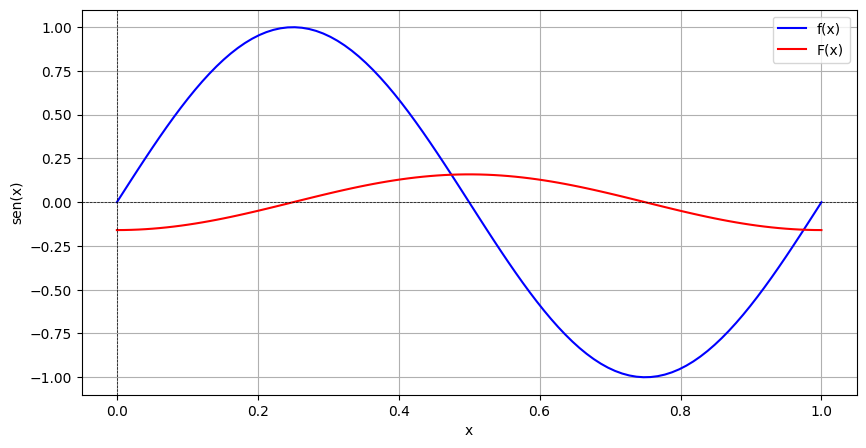

In [8]:
x = np.linspace(0, 1, 100)
y1 = np.sin(2*np.pi*x)
y2 = (-1)/(2*np.pi)*(np.cos(2*np.pi*x))
# plota
plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='f(x)', color='blue')
plt.plot(x, y2, label='F(x)', color='red')
plt.xlabel('x')
plt.ylabel('sen(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

- Calcule analiticamente a integral definida de 0 a 1.

$\int_0^1 \sin(2\pi x) dx \equiv \int_0^{2\pi} \frac{\sin(u)}{2\pi} du = \frac{-\cos(u)}{2\pi} \big|_0^{2\pi} = \big[ \frac{-\cos(2\pi)}{2\pi} \big] - \big[ \frac{-\cos(0)}{2\pi} \big] = 0$.
  

**Comente:**
  
`Qual é o valor esperado da área sob essa curva?`  
    O valor esperado da área sob a curva é 0
  
`O resultado faz sentido no contexto físico?`  
    Sim, pois representa um oscilação completa.
  
`O gráfico da função primitiva ajuda a interpretar esse comportamento?`  
    Como $f(x)$ é uma função muito simples, não acho que a primitiva adicione muito, já é uma função que temos noção de seu comportamento.

---

---
### b) Integração pela regra do trapézio

Calcule numericamente a integral definida entre 0 e 1 usando a regra do trapézio com n=10 subintervalos.  

- Calcule o erro absoluto em relação ao valor analítico.
- Comente: o método apresentou dificuldades com a oscilação da função?


In [46]:
def f(x):
    return np.sin(2 * np.pi * x)

# Parâmetros da integração
a, b = 0, 1 # Limites de integração
n = 10      # Número de subintervalos

def I_trapezio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    integral = (h / 2) * (f(x[0]) + 2 * np.sum(f(x[1:-1])) + f(x[-1]))
    return integral

print(I_trapezio(f, a, b, n))
print(round(I_trapezio(f, a, b, n), 10) ) 

-1.0106430996148606e-16
-0.0


O erro é da ordem $10^{-16}$, pode ser desprezado

---
### c) Integração pela regra de Simpson

Aplique a regra de Simpson com n=10 subintervalos (lembrando que n deve ser par).
  
- Calcule o erro em relação ao valor exato.
- Compare com o resultado obtido com a regra do trapézio.


In [44]:
def I_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("O número de subintervalos n deve ser par.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1) 
    termos_impares = 4 * np.sum(f(x[1:-1:2]))  # Termos ímpares (k=1,3,5,...)
    termos_pares = 2 * np.sum(f(x[2:-1:2]))
    integral = (h / 3) * (f(x[0]) + termos_impares + termos_pares + f(x[-1]))
    return integral

print(I_simpson(f, a, b, n))
print(round(I_simpson(f, a, b, n), 10)  )

-3.77702593176532e-17
-0.0


In [48]:
I_simpson(f, a, b, n) - I_trapezio(f, a, b, n)

np.float64(6.329405064383286e-17)

O erro é da ordem $10^{-17}$, pode ser desprezado. O mesmo acontece para o erro em relação a regra do trapézio.

---
### d) Aumento da resolução

Repita os cálculos com $n = 100$ e $n = 1000$ subintervalos.
  
Apresente um gráfico comparando os valores obtidos por cada método em função do número de subintervalos. Se desejar, apresente também os erros em escala logarítmica.
  
Comente:
- Qual método apresentou convergência mais rápida?
- Algum dos métodos mostrou comportamento oscilante com o aumento de n?

In [57]:
N = [10, 100, 1000]
for n in N:
    print(f"n = {n}")
    print(f"Trapézio: {I_trapezio(f, a, b, n)}")
    print(f"Simpson: {I_simpson(f, a, b, n)}")
    print()

n = 10
Trapézio: -1.0106430996148606e-16
Simpson: -3.77702593176532e-17

n = 100
Trapézio: -1.4408545216571087e-17
Simpson: 1.2189776790478849e-18

n = 1000
Trapézio: -5.696588354072275e-17
Simpson: -8.164311994315687e-20



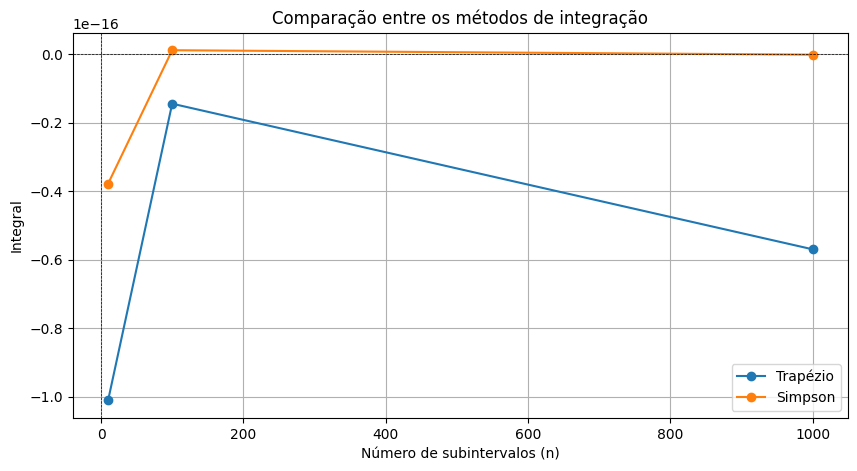

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(N, [I_trapezio(f, a, b, n) for n in N], label='Trapézio', marker='o')
plt.plot(N, [I_simpson(f, a, b, n) for n in N], label='Simpson', marker='o')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Integral')
plt.title('Comparação entre os métodos de integração')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

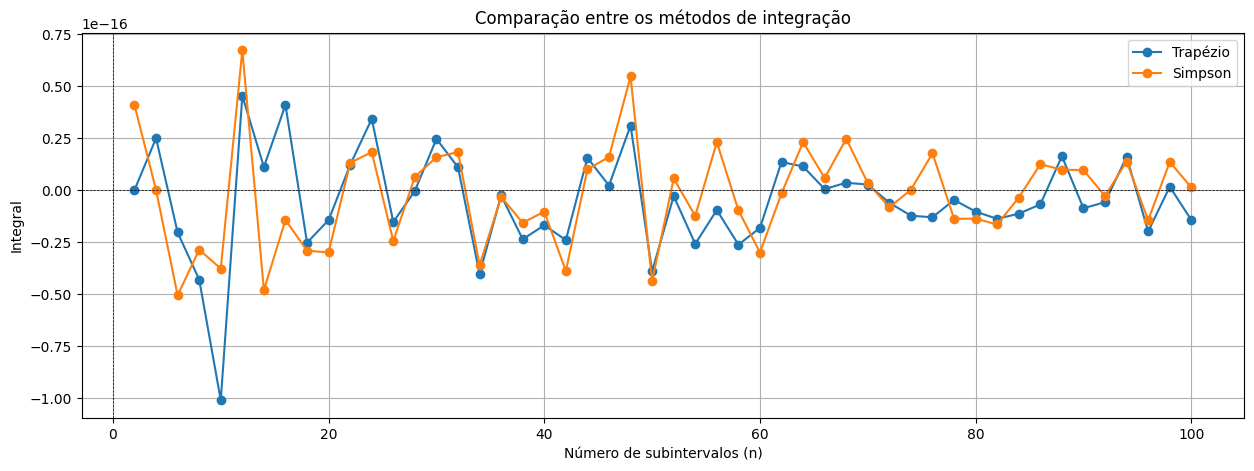

In [63]:
M = np.arange(2, 101, 2)  # n deve ser par para Simpson
plt.figure(figsize=(15, 5))
plt.plot(M, [I_trapezio(f, a, b, n) for n in M], label='Trapézio', marker='o')
plt.plot(M, [I_simpson(f, a, b, n) for n in M], label='Simpson', marker='o')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Integral')
plt.title('Comparação entre os métodos de integração')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

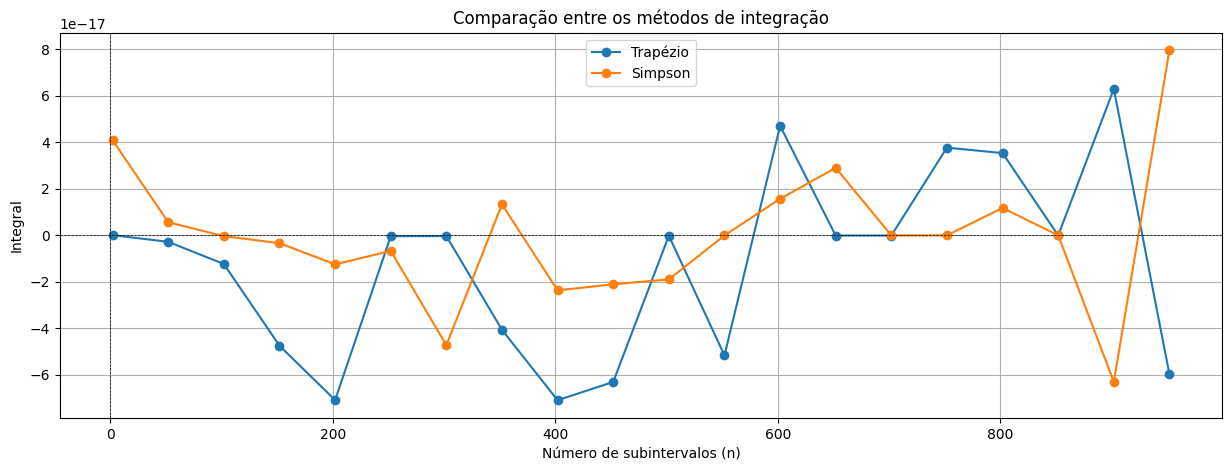

In [68]:
M = np.arange(2, 1002, 50)  # n deve ser par para Simpson
plt.figure(figsize=(15, 5))
plt.plot(M, [I_trapezio(f, a, b, n) for n in M], label='Trapézio', marker='o')
plt.plot(M, [I_simpson(f, a, b, n) for n in M], label='Simpson', marker='o')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Integral')
plt.title('Comparação entre os métodos de integração')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()